In [2]:
import clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
file_name = "data/dataset.csv"
clusterator = clustering.Clusterator(file_name=file_name)

Values of column price:
   cluster    min     max        mean
0        0  108.0  9994.0  272.489264
1        1   10.0   301.0   86.345328
2        2   14.0  5000.0  185.004285
3        3   20.0  1500.0  164.636167
4        4   31.0  1002.0  188.764706
Values of column minimum_nights:
   cluster  min   max        mean
0        0    1   180   24.163877
1        1    1   150   26.995357
2        2    1   183   28.753080
3        3    1   186   29.179487
4        4  200  1250  446.894118
Values of column calculated_host_listings_count:
   cluster  min  max       mean
0        0    1  201   2.882223
1        1    1  589  16.193268
2        2    1  713  60.536690
3        3    1  713   9.453441
4        4    1   16   2.600000
Values of column popularity:
   cluster       min         max       mean
0        0  0.000000   80.000000  10.009824
1        1  0.925926  100.000000  10.555097
2        2  0.000000   50.000000   3.180361
3        3  0.000000    3.007519   0.258428
4        4  0.000000 

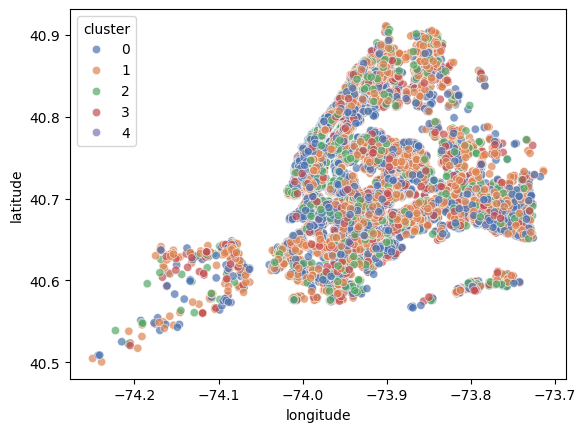

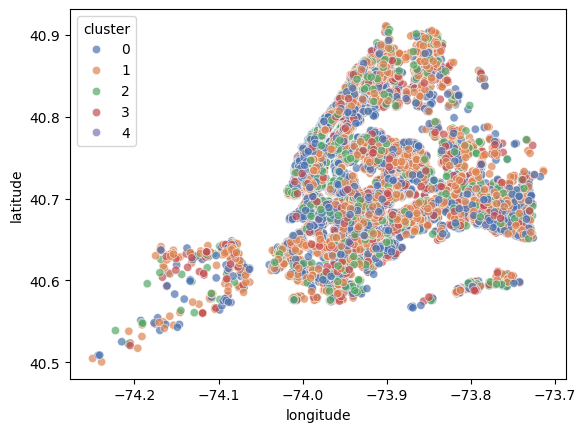

In [6]:
model = KMeans(n_clusters=5)
clusterator.clusterize(columns=["price", "minimum_nights", "calculated_host_listings_count", "popularity", "rating"], model=model)
clusterator.plot(show_values=["price", "minimum_nights", "calculated_host_listings_count", "popularity", "rating"])

Values of column price:
   cluster   min     max        mean
0        0  20.0  9994.0  214.193645
1        1  14.0  5000.0  193.310630
2        2  10.0   650.0  101.790529
3        3  25.0  7498.0  207.504738
4        4  17.0  1456.0  141.588994
Values of column minimum_nights:
   cluster  min   max       mean
0        0    1  1124  37.726619
1        1    1  1250  32.025456
2        2    1   120  27.324019
3        3    1   200  24.768584
4        4    1   150  25.763543
Values of column calculated_host_listings_count:
   cluster  min  max        mean
0        0    1   52    2.948741
1        1    1   56    5.133471
2        2    1   56    3.049915
3        3    1   38    2.823569
4        4    8  713  142.276440
Values of column popularity:
   cluster  min    max       mean
0        0  0.0   20.0   0.318064
1        1  0.0   50.0   2.960447
2        2  0.0  100.0   9.417784
3        3  1.0   80.0  10.532931
4        4  0.0   40.0   7.102927
Values of column rating:
   cluster   min  

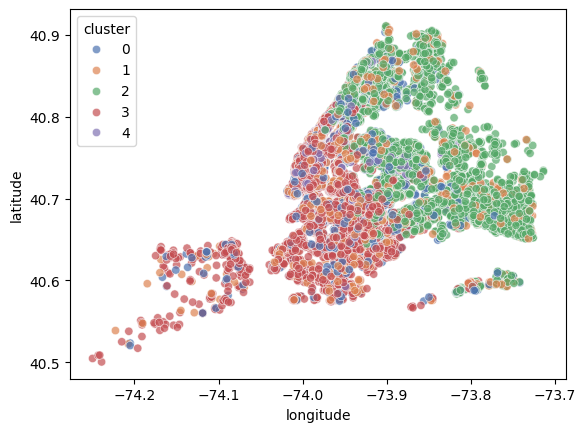

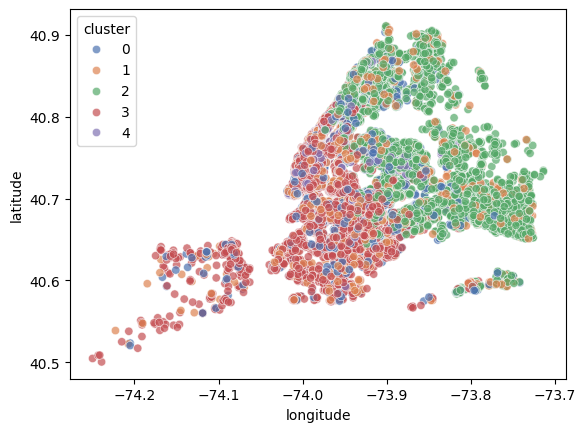

In [7]:
model = KMeans(n_clusters=5)
clusterator.clusterize(columns=["longitude", "latitude", "price", "minimum_nights", "calculated_host_listings_count", "popularity", "rating"], model=model)
clusterator.plot(show_values=["price", "minimum_nights", "calculated_host_listings_count", "popularity", "rating"])